In [1]:
import numpy as np
from astropy.table import Table, join, hstack, vstack
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt


In [2]:
## define the redshift bins strings that will make it easier to read z-bins
zbins_str = ['0.2 < z < 0.5','0.5 < z < 0.8' ,'0.8 < z < 1.1' ,'1.1 < z < 1.5','1.5 < z < 2.0' ,'2.0 < z < 2.5' ,'2.5 < z < 3.0' ,'3.0 < z < 3.5' ,'3.5 < z < 4.5' ,'4.5 < z < 5.5' ,'5.5 < z < 6.5','6.5 < z < 7.5','7.5 < z < 8.5','8.5 < z < 10.0','10.0 < z < 12.0']

## Plot the SMF in all 15 $z$-bins

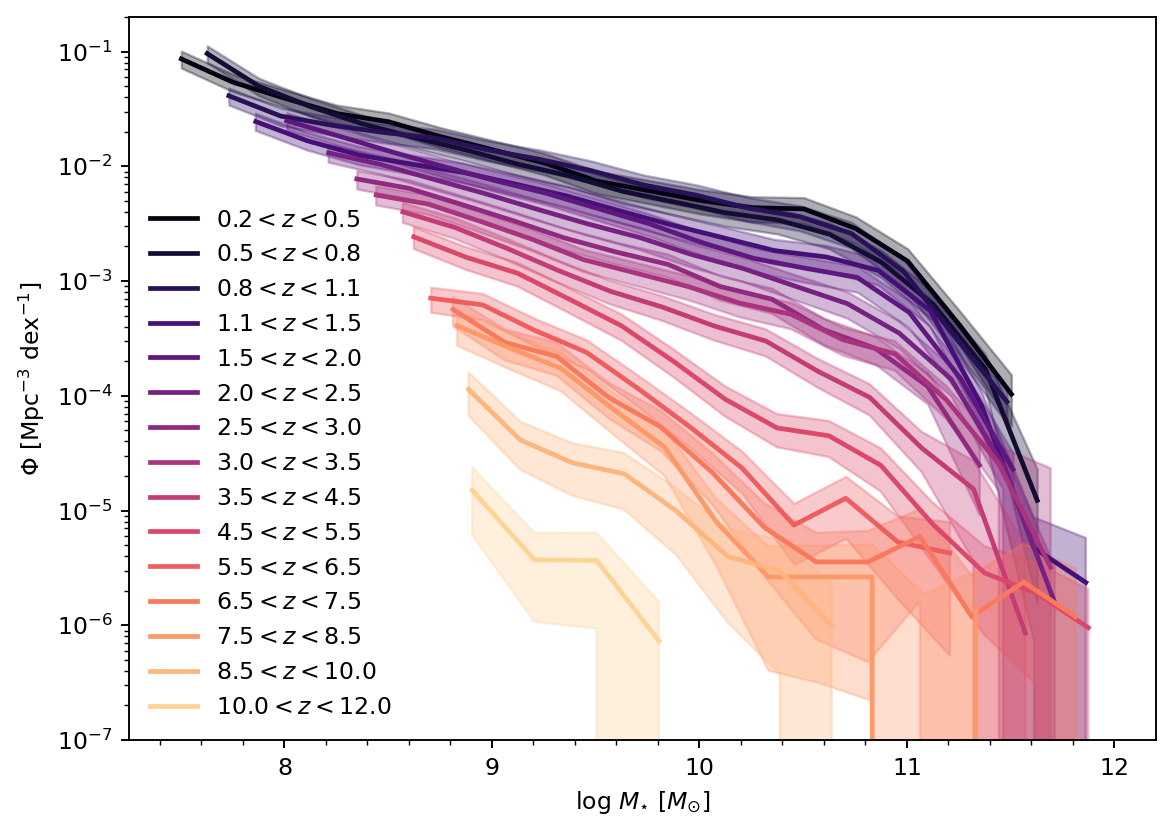

In [15]:
## read the table
smf_data = Table.read('SMF_data_points.ecsv', format='ascii.ecsv')

# define empty dictionaries to store values for each z-bin
logmass = {}
Phi = {}
dPhi = {}
# read for each z-bin
for zb in zbins_str:
    logmass[zb] = smf_data[smf_data['Redshift']==zb]['M_star']
    Phi[zb] = smf_data[smf_data['Redshift']==zb]['Phi']
    dPhi[zb] = smf_data[smf_data['Redshift']==zb]['dPhi']


# Create a figure
fig, axs = plt.subplots(1, 1, figsize=(7, 5), dpi=170)
fig.subplots_adjust(hspace=0.00, wspace=1.000)


for i, zb in enumerate(zbins_str):
    axs.plot(logmass[zb], Phi[zb], lw=2, alpha=1.0, color=plt.cm.magma((i + 0.5)/16), label=f'${zb}$')
    axs.fill_between(logmass[zb], y1=Phi[zb]+dPhi[zb], y2=Phi[zb]-dPhi[zb], alpha=0.32, 
                     color=plt.cm.magma((i + 0.5)/16))
    
# Set axes properties
axs.set_yscale('log')
axs.set_ylim(1.0e-7, 0.2)
axs.set_xlim(7.25, 12.2)
axs.set_xlabel('log $M_{\star}$ [$M_{\odot}$]')
axs.set_ylabel('$\\Phi$ [Mpc$^{-3}$ dex$^{-1}$]')
axs.minorticks_on()
axs.legend(frameon=False)
plt.tight_layout()
plt.show()

# The cosmic star formation rate density

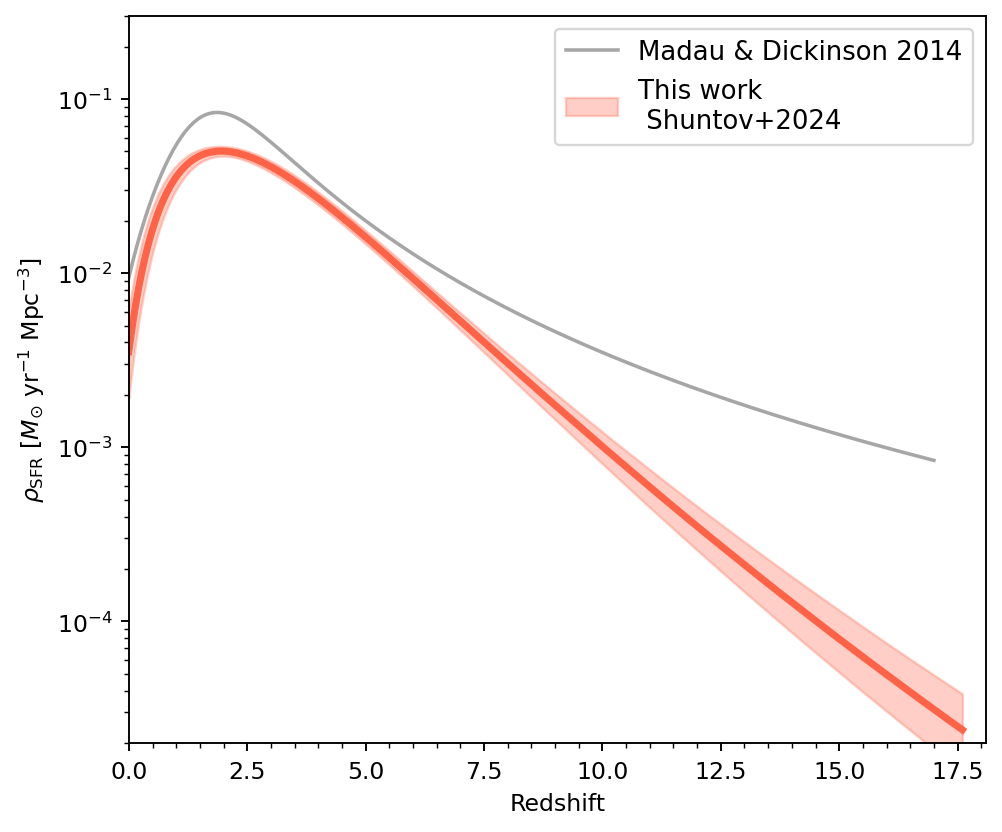

In [13]:
from matplotlib.colors import LinearSegmentedColormap

def MD14_sfrd(z):
    psi = 0.015 * (1+z)**2.7 / (1 + ((1+z)/2.9)**5.6) # Msol yr-1 Mpc-3
    return psi

f_chab_to_salp = 1/0.63
f_salp_to_chab = 0.63
f_krup_to_chab = 0.67

z_values = np.linspace(0,17,200)


fig, axs = plt.subplots(1, 1, dpi=170, figsize=(6,5))

        
axs.plot(z_values, MD14_sfrd(z_values)* f_salp_to_chab, color='gray', lw=1.5, alpha=0.7, label='Madau & Dickinson 2014')

smd_data = Table.read('CSFRD_inferred_from_SMD.ecsv', format='ascii.ecsv')
axs.plot(smd_data['Redshift'], smd_data['sfrd_50'], color='tomato', lw=3, ls='-') # This work
axs.fill_between(smd_data['Redshift'], y1=smd_data['sfrd_16'], 
                        y2=smd_data['sfrd_84'], label='This work \n Shuntov+2024', alpha=0.3, color='tomato')
 


axs.set_ylabel(r'$\rho_{\rm SFR}$ [$M_{\odot}$ yr$^{-1}$ Mpc$^{-3}$]')
axs.set_yscale('log')
axs.set_ylim(2.0e-5, 3.0e-1)
axs.set_xlim(0, 18.1)
axs.set_xlabel('Redshift')
axs.minorticks_on()
axs.legend(fontsize=11)
plt.tight_layout()
plt.show()
